## Loading Data

In [1]:
import gzip
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
from scipy.stats import multivariate_normal
import time

In [2]:
def load_mnist_images(filename):
    # Read the inputs in Yann LeCun's binary format.
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1,784)
    return data

def load_mnist_labels(filename):
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

In [3]:
## Load the training set
train_data = load_mnist_images('../MNIST Data/train-images-idx3-ubyte.gz')
train_labels = load_mnist_labels('../MNIST Data/train-labels-idx1-ubyte.gz')

## Load the testing set
test_data = load_mnist_images('../MNIST Data/t10k-images-idx3-ubyte.gz')
test_labels = load_mnist_labels('../MNIST Data/t10k-labels-idx1-ubyte.gz')

In [4]:
## Compute the number of examples of each digit
train_digits, train_counts = np.unique(train_labels, return_counts=True)
print("Training set distribution:")
print(dict(zip(train_digits, train_counts)))

test_digits, test_counts = np.unique(test_labels, return_counts=True)
print("Test set distribution:")
print(dict(zip(test_digits, test_counts)))

Training set distribution:
{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test set distribution:
{0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


## Visualization

In [5]:
def displaychar(image):
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()

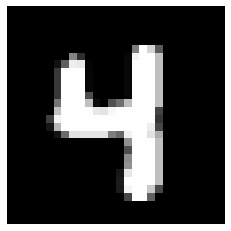

In [6]:
displaychar(train_data[58])

## Fitting a Gaussian Generative Model on Training Data

In [7]:
def fit_generative_model(x,y,c):
    k = 10  # labels 0,1,...,k-1
    d = (x.shape)[1]  # number of features
    mu = np.zeros((k,d))
    sigma = np.zeros((k,d,d))
    pi = np.zeros(k)
    for label in range(k):
        indices = (y == label)
        mu[label] = np.mean(x[indices,:], axis=0)
        sigma[label] = np.cov(x[indices,:], rowvar=0, bias=1)
        pi[label] = float(sum(indices))/float(len(y))
    #c=2560
    sigma+=c*np.identity(784)
    return mu, sigma, pi

In [8]:
def calc(c):
    mu, sigma, pi = fit_generative_model(train_data, train_labels,c)
    return(mu,sigma,pi)

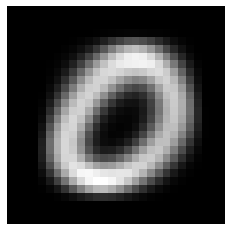

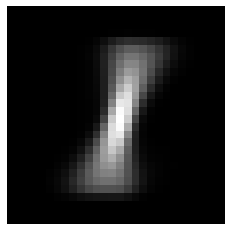

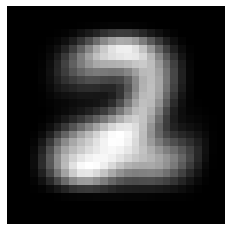

In [9]:
mu,sigma,pi=calc(1000)
displaychar(mu[0])
displaychar(mu[1])
displaychar(mu[2])

## Making predictions on the Test Data

In [10]:
def Gaussian_prediction(mu,sigma,pi):
    k=10
    score = np.zeros((len(test_labels),k))
    for label in range(0,k):
        rv = multivariate_normal(mean=mu[label], cov=sigma[label])
        for i in range(0,len(test_labels)):
           score[i,label] = np.log(pi[label]) + rv.logpdf(test_data[i,:])
    predictions = np.argmax(score, axis=1)
    # Finally, tally up score
    errors = np.sum(predictions != test_labels)
    #print("Your model makes " + str(errors) + " errors out of 10000")
    return(errors)

In [11]:
%%time
err=[]
for i in range(1,3000,10):
    mu,sigma,pi=calc(i)
    err.append(Gaussian_prediction(mu,sigma,pi))  

CPU times: user 3h 31min 57s, sys: 1min 33s, total: 3h 33min 30s
Wall time: 1h 47min 16s


In [17]:
print("Best model makes " + str(np.min(err)) + " errors out of 10000")

Best model makes 428 errors out of 10000


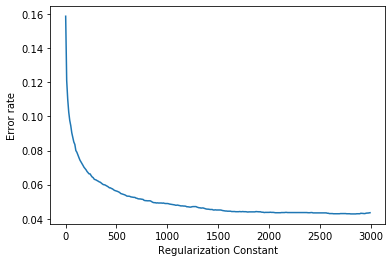

In [18]:
err1=np.array(err)/10000
plt.plot(range(1,3000,10),err1)
plt.ylabel('Error rate')
plt.xlabel('Regularization Constant')
plt.show()